## Query Optimization in boolean search

Easy explanation in pdf. Read pdf and solve problem 5

---

## Why we need Ranked Retrieval Model 
$$OR$$

## Limitation of Boolean Retrieval Model
The Boolean model is good for expert users who can write precise queries, but it has major problems for most users:

1. **No Spell Check:** It is not tolerant to spelling mistakes.  

2. **No Ranking:** It's an all-or-nothing model. A document either matches or it doesn't. This often results in too many (`OR` queries) or too few (`AND` queries) results. 

3. **No Term Weighting:** It does not consider *how many times* a term appears in a document. A document that mentions "Caesar" once is treated the same as one that mentions it 50 times.  

4. **No Proximity/Phrase Search:** The basic model doesn't understand "Stanford University" as a phrase, it just checks for "Stanford" AND "University".  

These limitations are the reason for moving to **Ranked Retrieval Models**.


---


# MCQ Questions
---

**Question1:** Imagine you have a collection of a million documents (N)  
with an average of 1,000 words per document and a total of  
M = 500,000 terms (unique words). Which of the following statements is **false** regarding its Term-Document Incidence Matrix?

a. The matrix would be extremely sparse (most entries would be 0).  
b. The matrix would consist of a distribution of 0 and 1 with dimensions M by N.  
c. The matrix shows the term frequency (tf) of each term in each document.  
d. Each column (vector) shows which terms are present in each document.  

<details>
<summary>Click for Answer</summary>

**Answer: (c)**  
The Term-Document **Incidence Matrix** only records *presence (1)* or *absence (0)* of a term — not its *frequency*.  
To represent frequency, we use the **Term-Frequency Matrix**, not the incidence matrix.
</details>


---


**Question 2:** Which of the following statements is **false** with regard to the Boolean Retrieval Model?

a. It answers queries based on Boolean expressions (AND, OR, and NOT).  
b. It views documents as a set of terms.  
c. It is very precise, as its queries need to meet a very specific condition.  
d. It cannot combine two operators, such as “AND NOT” or “OR NOT”.  

<details>
<summary>Click for Answer</summary>

**Answer: (d)**  
The Boolean Retrieval Model **can** combine multiple operators, such as  
`term1 AND NOT term2` or `term1 OR NOT term2`.  
Hence, option (d) is **false**.
</details>


---

**Question 3:** Select the most efficient processing order for the Boolean query **Q**.  
Q: `"trees AND marmalade AND eyes"`

| Term | Document Frequency |
|------|--------------------|
| eyes | 213,312 |
| marmalade | 107,913 |
| trees | 316,812 |

a. (marmalade AND eyes) first, then merge with trees.  
b. (marmalade AND trees) first, then merge with eyes.  
c. (trees AND eyes) first, then merge with marmalade.  
d. Any combination would result in the same amount of operations.  

<details>
<summary>Click for Answer</summary>

**Answer: (a)**  
The most efficient order is to process the **smallest posting lists first**.  
Since `marmalade` (107,913) and `eyes` (213,312) have the smallest document frequencies,  
it’s optimal to evaluate **(marmalade AND eyes)** first, then merge with `trees` (316,812).
</details>


---

**Question 4:** Which statement is **false** regarding the Boolean Retrieval model?  
* (a) It does not perform query spell checking.  
* (b) It does not capture term position.  
* (c) It does not consider document structure.  
* (d) It considers term frequency information to rank results.  

<details>
<summary>Click for Answer</summary>

**Answer: (d)**  
The standard Boolean model does *not* use term frequency or rank results.
</details>


---

# Recall of Basic Indexing Pipeline

>img : indexingPipeline

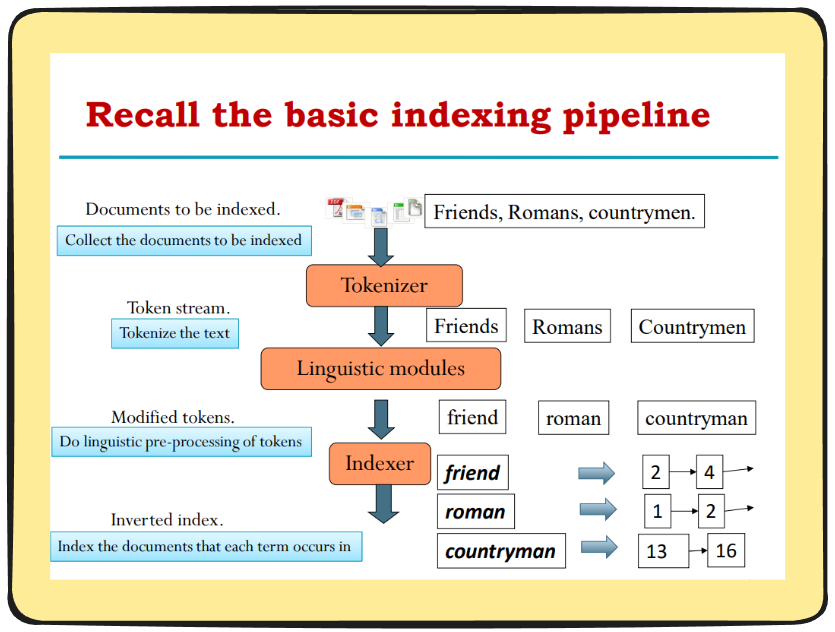

---

## Document Preprocessing.. 

The indexing process doesn't start with text; it starts with a file, which is just a sequence of bytes. We must parse these bytes to extract a character sequence , which is what we can then tokenize

Our goal is to.. 

1. Convert the file (Sequence of bits) to Sequence of Characters.. 

2. Convert Character into Tokens (Tokenization)

## Challenges in Parsing 
To parse a document correctly, we must first determine three things:

1. **Document Format:** Is it a PDF, Word, Excel, or HTML file ? Each format must be parsed differently to extract the text.

2. **Language:** Is the text in English, Hindi, or German? The language determines how we tokenize (e.g., German has compound words) and what linguistic preprocessing we do .

3. **Character Set:** Is it using ASCII, Unicode (like UTF-8), or another standard? This is needed to map the bytes to the correct characters

---

## Question. What is Unit Document (or Granuality) and how it affects Precision and Recall. Explain the tradeoff between Precision and Recall..

## Answer
A **unit document** is the basic piece of information that the search engine indexes and treats as a single item . The *size* of this unit is called **indexing granularity**.

This is a crucial decision because it involves a direct **trade-off between precision and recall**:

### 1. Large Documents (Low Granularity)
* **Example:** Indexing an entire book as one single document.
* **Problem:** A query like "Christ University" might match a book about the "Middle Ages in Europe" simply because "Christ" appears in Chapter 1 and "University" appears in Chapter 10. This match is irrelevant to the user.
* **Effect:**
    * **Low Precision:** You get many irrelevant results (like the history book).
    * **High Recall:** You are more likely to find documents that contain the keywords *somewhere*.

### 2. Small Documents (High Granularity)
* **Example:** Indexing every single *paragraph* of that same book as a separate document.
* **Problem:** If the user queries "Christ University" and those two words appear in adjacent paragraphs (but not the *same* paragraph), the query will fail to return a match, even though that section of the book is highly relevant.
* **Effect:**
    * **High Precision:** Any paragraph that *does* match is highly likely to be relevant.
    * **Low Recall:** You will miss relevant documents where the search terms are slightly separated.

**In summary:**

| Granularity | Document Size | Precision | Recall |
| :--- | :--- | :--- | :--- |
| **Low** | Large (e.g., Book) | Low | High |
| **High** | Small (e.g., Paragraph) | High | Low |

### Solution: (Proximity Search)
1. The system designer must choose a granularity (or offer choices) based on the document collection and user needs. 'OR'
2. This problem can also be solved using proximity search (checking if terms are near each other)

---

## Tokenization Challenges: 

1. Apostrophe

2. Hyphen

3. Stopword

4. Numbers

5. Different language issue
    - **French:** L'ensemble could be one token or two.
    - **German:** Noun compounds are not segmented (e.g., Lebensversicherungsgesellschaftsangestellter is one long word for "life insurance company employee"

    - **Chinease/Japanese:** No spaces between words
    - **Arabic/Hebrew:** Written right-to-left, but numbers are written left-to-right

6. Normalization to terms: (U.S.A and USA)

7. Casefolding: (e.g., Fed vs fed for Federal Reserve System, or General Motors)

---











## Lemmatization vs Stemming
